# <font color='#6495ED'>k-Nearest Neighbors (kNN) model</font>


How can a KNN model help us predict which customers will or will not accept a credit card offer?


In [1]:


#data handling and transformation
import pandas as pd
import numpy as np

# data visualisation 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve


# machine learning metrics and scoring
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score



# machine learning models 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# kNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier # knn modeling 

import warnings

warnings.filterwarnings('ignore')



To do:
- either import data already cleaned and subsetted or 
- add script below


In [2]:
# import cleaned data with original samples
X = pd.read_csv(r'./../data/X.csv') # import the csv file using a relative path to the 'data' folder

#X= X.drop(columns=['Unnamed: 0']) # drop index column

y = pd.read_csv(r'./../data/y.csv') # import the csv file using a relative path to the 'data' folder
#y= y.drop(columns=['Unnamed: 0']) # drop index column


#import oversampled data with StandardScaler applied
oversampled_data = pd.read_csv(r'./../data/oversampled_data.csv') # import the csv file using a relative path to the 'data' folder


In [4]:

# convert yes and no to 1 and 0
oversampled_data['offer_accepted'] = oversampled_data['offer_accepted'].replace({'No': 0, 'Yes': 1}) 





## <font color='#6495ED'>Training the K-NN model</font>


How can a KNN model help us predict which customers will or will not accept a credit card offer?


## Splitting data intro train and test sets.

In [7]:
X = oversampled_data.drop('offer_accepted', axis = 1)
y = oversampled_data['offer_accepted']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [11]:

knn_model = KNeighborsRegressor(n_neighbors=4) # The keyword "n_neighbors" is what sets the K.
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

## Getting our predictions

In [26]:
knn_predictions = knn_model.predict(X_test)
knn_predictions

array([0.  , 1.  , 1.  , ..., 0.25, 1.  , 1.  ])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


## Getting the error metrics of our K-NN model

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

MAE = mean_absolute_error(y_test,knn_predictions)
MSE = mean_squared_error(y_test,knn_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,knn_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean absolute error of the model in the test set is: " , MAE)
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is:   0.13
The mean absolute error of the model in the test set is:  0.12633932959795538
The mean squared error of the model in the test set is:   0.09
The root mean squared error of the model in the test set is:   0.30
The R2 of the model in the test set is: 0.64


The KNN model appears to have performed reasonably well on the test set. The MAE and RMSE are relatively low, indicating that the model's predictions are fairly accurate. 

The R2 value of 0.64 suggests that the model explains about 64% of the variation in the dependent variable.

Plotting R squared

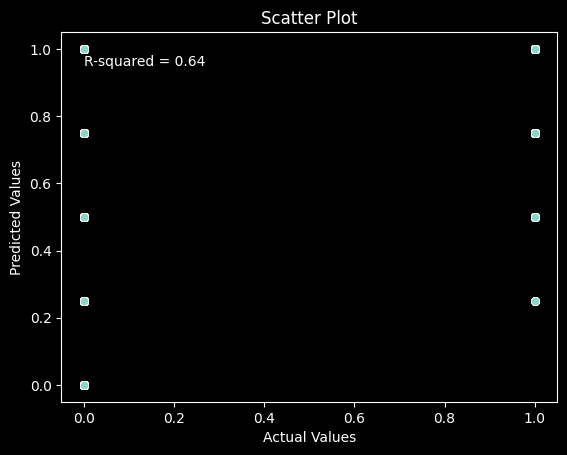

In [15]:
#sns.scatterplot(y = knn_predictions, x = y_test)



# Plot scatter plot
sns.scatterplot(x=y_test, y=knn_predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot')

# Add R-squared value to plot
plt.text(y_test.min(), knn_predictions.max()*0.95, f"R-squared = {R2:.2f}")

# Show the plot
plt.show()

# Getting the best k

Let's try to find the best K value from a pre-defined set of values.

In [23]:
scores = [] # We will store here the R2 values for each of our K-NN models with different K-values.
for i in range(2,20): # The values of K. = 2,3,4,5,6,7,8,9
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Now let's plot how it changes the score as a function of K.

Text(0, 0.5, 'R2')

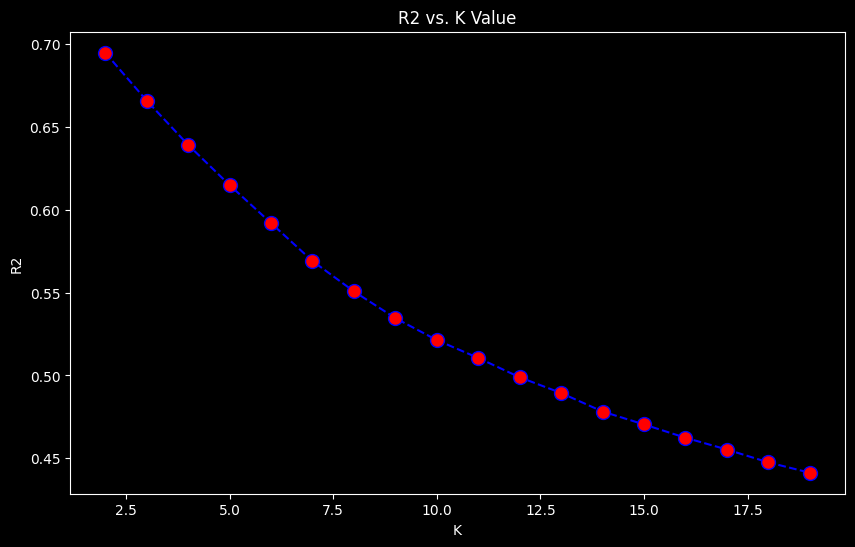

In [24]:
plt.figure(figsize=(10,6))
plt.plot(range(2,20), scores, color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('R2 vs. K Value')
plt.xlabel('K')
plt.ylabel('R2')

#threshold = 0.01 # minimum difference we want between two R2 consecutive values.
#delta = 10. # difference between two consecutive R2 values.
#k = 3 # initival value
#old_score = 0.

#while (delta >= threshold):
#  knn_model = KNeighborsRegressor(n_neighbors=k) # The keyword "n_neighbors" is what sets the K.
#  knn_model.fit(X_train, y_train)
#  knn_predictions = knn_model.predict(X_test) 
#  new_score = r2_score(y_test,knn_predictions)
#  delta = new_score - old_score
#  k = k + 4 
#  old_score = new_score

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
print('R2:', round(metrics.r2_score(y_test, y_pred),2))
print('Adjusted R:', round( 1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),2))

Mean Absolute Error: 0.39
Mean Squared Error: 0.19
Root Mean Squared Error: 0.44
R2: 0.22
Adjusted R: 0.22


The Linear Regression model performs worse than the KNN model, with a higher MAE, MSE, RMSE, and a lower R2 score. 

The Adjusted R-squared value is the same as the R-squared value in this case, which means that none of the predictors are contributing significantly to the model.

In [25]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))

Accuracy: 0.70
Precision: 0.68
Recall: 0.74
F1-score: 0.71


Very similar to the linear regression that we did on data imbalance